In [1]:
import torchxrayvision as xrv

/home/andrei/anaconda3/envs/mlmi/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pydicom as dicom
import matplotlib.pylab as plt

In [3]:
image_path1 = '/home/andrei/Downloads/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm' 
image_path2 = '/home/andrei/Downloads/174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.dcm' 

In [4]:
ds1 = dicom.dcmread(image_path1)
ds2 = dicom.dcmread(image_path2)


Text(0.5, 1.0, '174413ec')

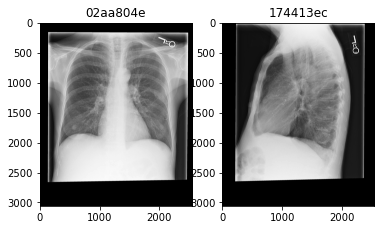

In [5]:
plt.subplot(1,2,1)
plt.imshow(ds1.pixel_array, cmap='gray')
plt.title('02aa804e')

plt.subplot(1,2,2)
plt.imshow(ds2.pixel_array, cmap='gray')
plt.title('174413ec')

FINAL REPORT
 EXAMINATION:  CHEST (PA AND LAT)
 
 INDICATION:  ___F with new onset ascites  // eval for infection
 
 TECHNIQUE:  Chest PA and lateral
 
 COMPARISON:  None.
 
 FINDINGS: 
 
 There is no focal consolidation, pleural effusion or pneumothorax.  Bilateral
 nodular opacities that most likely represent nipple shadows. The
 cardiomediastinal silhouette is normal.  Clips project over the left lung,
 potentially within the breast. The imaged upper abdomen is unremarkable.
 Chronic deformity of the posterior left sixth and seventh ribs are noted.
 
 IMPRESSION: 
 
 No acute cardiopulmonary process.


In [6]:
folder = '/home/andrei/TUM/SoSe2022/MLMI/mimic-cxr/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10000032/s50414267.txt'
os.path.exists(folder)

True

In [5]:
import os
from tqdm import tqdm as tqdm

In [19]:
MIMIC_CXR_DCM_PATH = '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/'
MIMIC_CXR_JPG_PATH = '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/'
import glob

In [120]:
# Jpeg files does not include the patient information.
def return_valid_samples(cxr_dcm_path, cxr_jpg_path):

    main_path = cxr_jpg_path

    valid_samples = []
    for folder in tqdm([dir for dir in os.listdir(main_path) if not dir.startswith(".") and not dir.endswith('.html')]):
        #print(f"Cur folder : ",folder)
        for patient in [pat_fold for pat_fold in os.listdir(os.path.join(main_path, folder)) if not pat_fold.endswith('.html') and not pat_fold.startswith(".")]:
            #print("Current patient", patient)
            for record in [cur_file for cur_file in os.listdir(os.path.join(main_path, folder, patient)) if not cur_file.endswith('html') and not cur_file.endswith('.txt') and not cur_file.startswith('.') and cur_file != '/']:
                # Text is only in the record folder
                path_of_record_folder_text = os.path.join(cxr_dcm_path, folder, patient, record)
                path_of_record_folder = os.path.join(main_path, folder, patient, record)
                # Each folder has its corresponding txt file
                txt_path = path_of_record_folder_text + '.txt'
                # Some folders are empty and they are useless
                if len(glob.glob1(path_of_record_folder,"*.jpg")) == 0:
                    #print("No images in this folder",path_of_record_folder)
                    continue
                else:
                    valid_samples.append(
                        {'folder_path': path_of_record_folder,
                        'txt_path': txt_path}
                    )
    return valid_samples

In [121]:
valid_list = return_valid_samples(MIMIC_CXR_DCM_PATH, MIMIC_CXR_JPG_PATH )

100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


In [92]:
import json

In [93]:
with open("../data/external/mimic_cxr_all.json", "w") as final:
   json.dump(valid_list, final, indent=2)
with open("../data/external/valid_data.json", "r") as f:
   valid_data_points = json.load(f)


In [94]:
valid_data_points

[{'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10045779/s53819164',
  'txt_path': '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10045779/s53819164.txt'},
 {'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001851/s59664767',
  'txt_path': '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10001851/s59664767.txt'},
 {'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10078297/s57167962',
  'txt_path': '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10078297/s57167962.txt'},
 {'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10045574/s52738750',
  'txt_path': '/Users/caghankoksal/D

In [95]:
import torch 
from sklearn import model_selection
train_split, val = model_selection.train_test_split(valid_data_points, test_size=0.2)
val_split, test_split = model_selection.train_test_split(val, test_size=0.5)

In [96]:
with open("../data/external/mimic_cxr_train.json", "w") as final:
   json.dump(train_split, final, indent=2)

In [97]:
with open("../data/external/mimic_cxr_val.json", "w") as final:
   json.dump(val_split, final, indent=2)


with open("../data/external/mimic_cxr_test.json", "w") as final:
   json.dump(test_split, final, indent=2)


In [98]:
len(train_split)

1667

In [99]:
len(val_split)

208

In [100]:
with open("../data/external/valid_data.json", "r") as f:
   valid_data_points = json.load(f)

In [101]:
from os import makedirs, path, getcwd
from PIL import Image
from tqdm import tqdm as tqdm

In [79]:
for file in tqdm(valid_data_points):
    folder_path = file['folder_path']
    new_folder_path = folder_path.replace("mimic-cxr-jpg","mimic-cxr-jpg-resized")
    if not path.isdir(new_folder_path):
        makedirs(new_folder_path)

    for img_path in glob.glob1(folder_path,"*.jpg"):
        cur_img_full_path = os.path.join(folder_path, img_path)
        try:
            cur_img = Image.open(cur_img_full_path)
            cur_img_resized = cur_img.resize((224,224))
            cur_img_resized.save(fp=os.path.join(new_folder_path,img_path),format="JPEG",quality=100)
        except:
            print("Error in resizing",cur_img_full_path)
            continue


    

 50%|████▉     | 1036/2084 [01:07<01:05, 16.04it/s]

Error in resizing /Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10098008/s51057848/05154550-7dad906e-eaab463a-b8c112f9-50ce03ce.jpg


100%|██████████| 2084/2084 [02:16<00:00, 15.31it/s]


In [113]:
valid_data_points[0:4]

[{'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10045779/s53819164',
  'txt_path': '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10045779/s53819164.txt'},
 {'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001851/s59664767',
  'txt_path': '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10001851/s59664767.txt'},
 {'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10078297/s57167962',
  'txt_path': '/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10078297/s57167962.txt'},
 {'folder_path': '/Users/caghankoksal/Desktop/development/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10045574/s52738750',
  'txt_path': '/Users/caghankoksal/D

In [82]:
import shutil

In [122]:
def move_all_txt(valid_data_points):
    for file in tqdm(valid_data_points):
        txt_file_path = file['txt_path']
        new_folder_path = '/' + os.path.join(*txt_file_path.split("/")[:-1]).replace("mimic-cxr","mimic-cxr-txt")
        print(new_folder_path)
        if not path.isdir(new_folder_path):
            makedirs(new_folder_path)

        shutil.copyfile(txt_file_path, os.path.join(new_folder_path,txt_file_path.split('/')[-1]))
        
            

In [123]:
move_all_txt(valid_data_points)

 16%|█▌        | 325/2084 [00:00<00:00, 3246.76it/s]

/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10045779
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10001851
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10078297
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10045574
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10036086
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10036086
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10027100
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10027100
/Users/caghankoksal/Desktop/development/

 44%|████▍     | 924/2084 [00:00<00:00, 2519.08it/s]

/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10094107
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10094107
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10055694
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10055694
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10055694
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10055694
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10055694
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10055694
/Users/caghankoksal/Desktop/development/

 71%|███████   | 1481/2084 [00:00<00:00, 2662.49it/s]

/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10088669
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10088669
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10088669
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10052926
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10052926
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10052926
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10052926
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10052926
/Users/caghankoksal/Desktop/development/

100%|██████████| 2084/2084 [00:00<00:00, 2667.53it/s]

/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10027602
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10027602
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10027602
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10027602
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10030487
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10030487
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10030487
/Users/caghankoksal/Desktop/development/Flamingo-playground/physionet.org/files/mimic-cxr-txt/2.0.0/files/p10/p10030487
/Users/caghankoksal/Desktop/development/